In [0]:
!wget -O "dnn_utils.py" "https://raw.githubusercontent.com/liqiang311/deeplearning.ai/master/1_Neural%20Networks%20and%20Deep%20Learning/week4/Building%20your%20Deep%20Neural%20Network%20-%20Step%20by%20Step/dnn_utils.py"

--2020-02-18 18:50:25--  https://raw.githubusercontent.com/liqiang311/deeplearning.ai/master/1_Neural%20Networks%20and%20Deep%20Learning/week4/Building%20your%20Deep%20Neural%20Network%20-%20Step%20by%20Step/dnn_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1756 (1.7K) [text/plain]
Saving to: ‘dnn_utils.py’

dnn_utils.py        100%[===================>]   1.71K  --.-KB/s    in 0s      

2020-02-18 18:50:26 (290 MB/s) - ‘dnn_utils.py’ saved [1756/1756]



IMPORT LIBRARIES

In [0]:
from keras.datasets import mnist
from keras.utils import to_categorical
from dnn_utils import sigmoid, relu, relu_backward
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print('Train shape = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Test shape = {}, y = {}'.format(X_test.shape, y_train.shape))

Train shape = (60000, 28, 28), y = (60000,)
Test shape = (10000, 28, 28), y = (60000,)


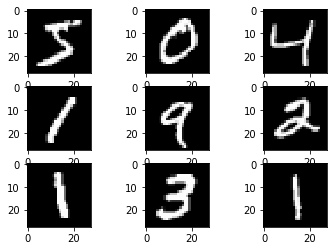

In [0]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
 
# show the figure
plt.show()

#Architecture

![Texte alternatif…](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

#Forward + Backward

![Texte alternatif…](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Neural%20Networks%20and%20Deep%20Learning/images/final%20outline.png)

Parameters Initialization

L : layer dims length \\
layer_dims[l] : Wl first shape, b shape \\
layer_dims[l-1]: Wl second shape


In [0]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
        print("parameter W" + str(l) + " shape :" + str(parameters['W' + str(l)].shape))
        print("parameter b" + str(l) + " shape :" + str(parameters['b' + str(l)].shape))

        
    return parameters

In [0]:
layers_dims = [X_train_flat_std.shape[0], 32, 32, 32, 10] #  5-layer model

In [0]:
parameters = initialize_parameters_deep(layers_dims)

parameter W1 shape :(128, 728)
parameter b1 shape :(128, 1)
parameter W2 shape :(128, 128)
parameter b2 shape :(128, 1)
parameter W3 shape :(64, 128)
parameter b3 shape :(64, 1)
parameter W4 shape :(10, 64)
parameter b4 shape :(10, 1)


Linear Forward 

In [0]:
def linear_forward(A, W, b):
    """
    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    #print("W shape : ", W.shape, "A shape : ", A.shape, "b shape :", b.shape)
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [0]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

#Linear + Activation Process

![Texte alternatif…](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Neural%20Networks%20and%20Deep%20Learning/images/model_architecture_kiank.png)

In [0]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, 
                                            parameters['W' + str(l)], 
                                            parameters['b' + str(l)], 
                                            activation='relu')
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, 
                                         parameters['W' + str(L)], 
                                         parameters['b' + str(L)], 
                                         activation='sigmoid')
    caches.append(cache)
    assert(AL.shape == (10, X.shape[1]))
            
    return AL, caches

Loss Function $J$ Formula :
$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)$$
![Texte alternatif…](https://ml-cheatsheet.readthedocs.io/en/latest/_images/cross_entropy.png)

In [0]:
def compute_cost(AL, Y):
    """
    Implement the cost function.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) + np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

#BACKWARD PROPAGATION MODULE

![Texte alternatif…](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Neural%20Networks%20and%20Deep%20Learning/images/backprop_kiank.png)

#LINEAR BACKWARD

![Texte alternatif…](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Neural%20Networks%20and%20Deep%20Learning/images/linearback_kiank.png)

![Texte alternatif…](https://render.githubusercontent.com/render/math?math=dW%5E%7B%5Bl%5D%7D%20%3D%20%5Cfrac%7B%5Cpartial%20%5Cmathcal%7BL%7D%20%7D%7B%5Cpartial%20W%5E%7B%5Bl%5D%7D%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20dZ%5E%7B%5Bl%5D%7D%20A%5E%7B%5Bl-1%5D%20T%7D%20%5Ctag%7B8%7D&mode=display)


![Texte alternatif…](https://render.githubusercontent.com/render/math?math=db%5E%7B%5Bl%5D%7D%20%3D%20%5Cfrac%7B%5Cpartial%20%5Cmathcal%7BL%7D%20%7D%7B%5Cpartial%20b%5E%7B%5Bl%5D%7D%7D%20%3D%20%5Cfrac%7B1%7D%7Bm%7D%20%5Csum_%7Bi%20%3D%201%7D%5E%7Bm%7D%20dZ%5E%7B%5Bl%5D%28i%29%7D%5Ctag%7B9%7D&mode=display)

![Texte alternatif…](https://render.githubusercontent.com/render/math?math=dA%5E%7B%5Bl-1%5D%7D%20%3D%20%5Cfrac%7B%5Cpartial%20%5Cmathcal%7BL%7D%20%7D%7B%5Cpartial%20A%5E%7B%5Bl-1%5D%7D%7D%20%3D%20W%5E%7B%5Bl%5D%20T%7D%20dZ%5E%7B%5Bl%5D%7D%20%5Ctag%7B10%7D&mode=display)

In [0]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.squeeze(np.sum(dZ, axis=1, keepdims=True)) / m
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    #assert (isinstance(db, float))
    
    return dA_prev, dW, db

In [0]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        #print("linear activation backward activation cache", activation_cache.shape)
        dZ = sigmoid_backward(dA, activation_cache)
    
    # Shorten the code
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

#Linear Backward

![Texte alternatif…](https://github.com/Kulbear/deep-learning-coursera/raw/997fdb2e2db67acd45d29ae418212463a54be06d/Neural%20Networks%20and%20Deep%20Learning/images/mn_backward.png)

All L Model Backward

In [0]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[-1]
    #print('dAL shape',dAL.shape)
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

#Update Parameters


In [0]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)].reshape(grads["db" + str(l + 1)].shape[0], 1)
        #print("gives:",parameters["b" + str(l+1)].shape)
        
    return parameters

RESHAPE X_train, X_test

In [0]:
y_train_l = to_categorical(y_train).T
y_test_l = to_categorical(y_test).T

In [0]:
# Reshape the training and test examples 
X_train_flat = X_train.reshape(X_train.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
X_test_flat = X_test.reshape(X_test.shape[0], -1).T

In [0]:
print('Train shape = {}, y = {}'.format(X_train_flat.shape, y_train_l.shape))
print('Test shape = {}, y = {}'.format(X_test_flat.shape, y_test_l.shape))

Train shape = (784, 60000), y = (10, 60000)
Test shape = (784, 10000), y = (10, 10000)


In [0]:
# Standardize data to have feature values between 0 and 1.
X_train_flat_std = X_train_flat / 255.
X_test_flat_std = X_test_flat / 255.

In [0]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        #print(i)
        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)

        # Compute cost.
        cost = compute_cost(AL, Y)

        # Backward propagation.
        #print('Y shape: ', Y.shape)
        grads = L_model_backward(AL, Y, caches)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return parameters

Train & Plot Loss :

In [0]:
print(X_train_flat_std.shape, y_train_l.shape)

(784, 60000) (10, 60000)


In [0]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    #print("DA shap", dA.shape)
    #print("Z", Z.shape)
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [0]:
parameters = L_layer_model(X_train_flat_std, y_train_l, layers_dims, num_iterations=2500, print_cost=True)

parameter W1 shape :(128, 784)
parameter b1 shape :(128, 1)
parameter W2 shape :(128, 128)
parameter b2 shape :(128, 1)
parameter W3 shape :(64, 128)
parameter b3 shape :(64, 1)
parameter W4 shape :(10, 64)
parameter b4 shape :(10, 1)
Cost after iteration 0: 6.931509


KeyboardInterrupt: ignored

In [0]:
def predict(X, y, parameters):
  m = X.shape[1]
  n = len(parameters)
  p = np.zeros((10, m))
  missed = 0
  probas, caches = L_model_forward(X, parameters)

  for i in range(probas.shape[1]):
    indexMax = probas[:, i].argmax()
    p[indexMax, i] = 1
    if(indexMax != y.argmax()):
      missed += 1
  print("accuracy = ", 1 - missed/m)
  return p, missed, m

In [0]:
predictions, missed, m = predict(X_test_flat_std, y_test_l, parameters)

accuracy =  0.0039000000000000146


In [0]:
missed

9961